In [1]:
import utils
import importlib
importlib.reload(utils)

utils.say_hello()

hello!!!


# Summary Stats
Recall: we said that instances are sampled from the "universe of instances"

In stats, we say that a dataset is a sample from a population ("universe of instances")
* dataset = sample
* universe of instances = population

Example
* Sample: the number of emails CPSC 222 students receive in October 2021
* Population: the number of emails ALL students world-wide receive in October 2021
    * Expensive (time and money)

More key stats terms:
* Parameter: any measurable characteristic of a population
    * ex: population mean $\mu$
* Statistic: any measurable characteristic of a sampe
    * ex: sample mean $overline(x)$
* Descriptive stats: organizing, summarizing, presenting data in an informative way
    * ex: central tendency measures, charting, ...
* Inferential stats: making inferences that go beyond known data
    * ex: infer something about a population based on a sample
    * ex: hypothesis testing, prediction with linear regression, machine learning, ...
    * interpolating data to predict beyond what you know


## Summary Stats
A summary stat summarizes data into a single value or set of values

Number of instances:

In [20]:
import pandas as pd

x = [8, 5, 4, 9, 8, 6]
ser = pd.Series(x)
print(ser)
print("number of instances:", len(ser), ser.shape)

0    8
1    5
2    4
3    9
4    8
5    6
dtype: int64
number of instances: 6 (6,)


Min and max
* Doesn't make sense for nominal attributes

In [21]:
print("min:", ser.min(), "max:", ser.max())

min: 4 max: 9


## Central Tendency
Central Tendency represents the middle value(s) of a data distribution

Mid value: $\frac{min+max}{2}$

In [22]:
print("mid value:", (ser.min() + ser.max()) / 2)

mid value: 6.5


Arithmetic mean (AKA average)
* Senstitive to outliers
* Should only be applied if you know your data is numeric

In [23]:
print("mean", ser.mean())

mean 6.666666666666667


Median: middle value in a list of sorted values
* If the number of instances is even, then take the midpoint between the two middle numbers

In [24]:
print(ser.sort_values())
print(ser.median())

2    4
1    5
5    6
0    8
4    8
3    9
dtype: int64
7.0


Mode: the most frequently occurring value(s)

In [25]:
# 8 is int64 but mode is series
print(ser.mode())
print()
x = [8, 5, 4, 9, 8, 6, 9]
ser2 = pd.Series(x)
print(ser2)
print(ser2.mode())

0    8
dtype: int64

0    8
1    5
2    4
3    9
4    8
5    6
6    9
dtype: int64
0    8
1    9
dtype: int64


## Data Dispersion (Spread)
Range: max - min

In [26]:
print("range", ser.max() - ser.min())

range 5


Quantiles: roughly equalized partitions of the data (in sorted order)
* 2 quantiles: 1 data point that divides the dataset into 2 halves (AKA median)
* Quartiles: 3 data points that divides the dataset into quarters
* percentiles: 99 data points that divide the dataset into 100 groups
    * 25th percentile: 1st quartile
    * 50th percentile: 2nd quartile which is median
    * 75th percentie: 3rd quartile
* IQR, interquartile range: 75th percentile - 25th percentile, middle 50 percent

In [27]:
print(ser2.sort_values())
print("25th percentile/1st quantile:", ser.quantile([0.25]))
# 5.5 is not an actual data point in ser2, just saying 25% of data is smaller than 5.5

2    4
1    5
5    6
0    8
4    8
3    9
6    9
dtype: int64
25th percentile/1st quantile: 0.25    5.25
dtype: float64


In [28]:
# let's say we need an actual point in our dataset
sorted_ser2 = ser2.sort_values()
index = round(0.25 * len(sorted_ser2))
print("25th percentile:", sorted_ser2.iloc[index])

25th percentile: 6


## Box Plots
These are great visualizations of the spread of data
* Non-parametric

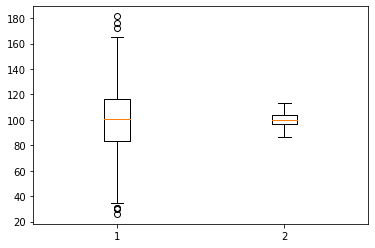

In [29]:
import matplotlib.pyplot as plt
import numpy as np

mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)
stdev = 5
num_samples = 500
x2 = np.random.normal(mean, stdev, num_samples)

# the orange horizontal line in the box is the median
# the box around the median is the IQR
# the lines that extend from the plot (whiskers) are the Q3/Q1 +/- 1.5 * IQR
# the circles ouside the whiskers are outliers

plt.boxplot([x1, x2])
plt.show()

Varience: spread the mean
* High variance: data is more spread out from the mean
* Low variance: data is more clustered around the mean

Standard deviation: sqaure root of variance
* More commonly used...it is in the same units as the mean


In [30]:
print("vairance:", ser.var())
print("standard deviation:", ser.std(), np.sqrt(ser.var()))

vairance: 3.866666666666667
standard deviation: 1.9663841605003503 1.9663841605003503


# Histogram Demo

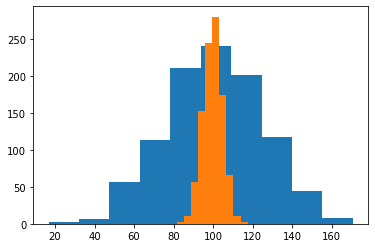

In [31]:
mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)
stdev = 5
num_samples = 1000 # orange, half as big as 1000
x2 = np.random.normal(mean, stdev, num_samples)

plt.figure()
plt.hist(x1, label="$\sigma=25$")
plt.hist(x2, label="$\sigma=5$")
plt.show()

## Empirical Rule for Normal Distributions
* If your data is "normal":
    * about what % is within mean +/- 1 standard deviation = 68%
    * about what % is within mean +/- 2 standard deviations = 95%
    * about what % is within mean +/- 3 standard deviations = 99.7%

Let's prove this for our sampe x1 data

In [32]:
count_within_1stdev = 0
count_within_2nddev = 0
count_within_3rddev = 0

mean_sampled = np.mean(x1)
print(mean_sampled)
std_sampled = np.std(x1)
print(std_sampled)

for value in x1:
    if mean_sampled - std_sampled <= value <= mean_sampled + std_sampled:
        count_within_1stdev += 1
    # finish other 2

print("within +/- standard dev:", count_within_1stdev / num_samples * 100)

100.628801773024
23.993873276356936
within +/- standard dev: 66.9
